In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


In [4]:
# groupby() without as_index
if True:
    first_even = example_df.groupby('even').first()
    print (first_even)
    #print (first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame

       value  above_three
even                     
False      1        False
True       2        False


In [5]:
# groupby() with as_index=False
if True:
    first_even = example_df.groupby('even', as_index=False).first()
    print (first_even)
    print (first_even['even']) # Now 'even' is still a column in the DataFrame


    even  value  above_three
0  False      1        False
1   True      2        False
0    False
1     True
Name: even, dtype: bool


In [7]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [12]:
subway_df.head(2)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [16]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index = False).mean() #as_index is used, so that main data would not chnage
data_by_location.head(3)

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763


In [18]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [20]:
scaled_entries = (data_by_location['ENTRIESn_hourly']/ data_by_location['ENTRIESn_hourly'] .std())

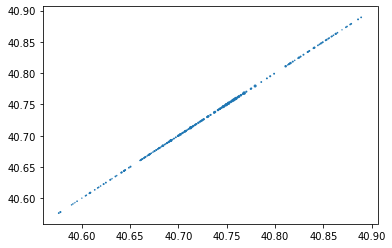

In [22]:
plt.scatter( data_by_location['latitude'], data_by_location['latitude'], s =  scaled_entries)